## Demo for strategy performance plots

In [1]:
from frozen.utils import perf_plot

In [2]:
import os
os.chdir(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))))
from demo.strategy.momentum.momentum import FactorFactory

In [3]:
strategy1 = FactorFactory()

### Cumulative Returns and Scatter Plot

🧊 Initializing FROZEN Backtest Framework...
✅ Successfully connected to database    🔗 Done!                                


Performing Backtest: 100%|██████████| 286/286 [00:03<00:00, 86.30it/s]


🔔 Warnings: Not consistent with date_rule for the last holding period.
+-----------+-------------+---------------+--------+---------+----------+-----------+---------+------------+----------------+
|   Account |   Benchmark |   Annual Rate |   Beta |   Alpha |   Sharpe |   Sortino |      IR |   Win Rate |   Max Drawdown |
+===========+=============+===============+========+=========+==========+===========+=========+============+================+
|     0.474 |      1.0033 |       -0.1333 |  0.765 | -0.1338 |  -0.6138 |    -0.829 | -0.0617 |     0.3986 |         0.6548 |
+-----------+-------------+---------------+--------+---------+----------+-----------+---------+------------+----------------+


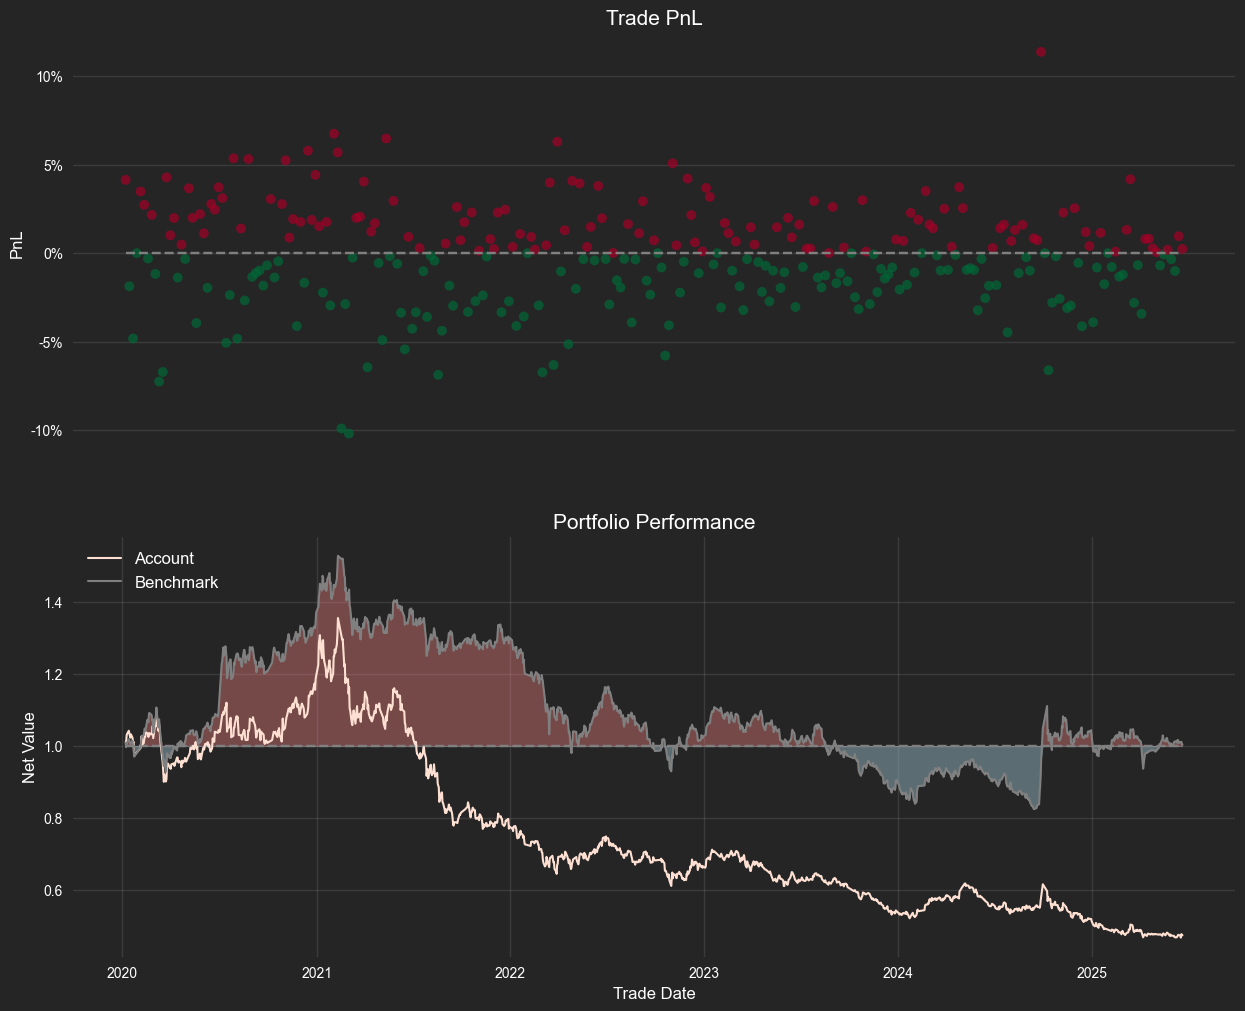

🎉 Execution complete!


In [4]:
port_ret_1 = strategy1.run_backtest(plot_type="all")

### Parameter Tuning 3D plot

In [5]:
strategy1.run_mode = "parallel"

In [ ]:
params = [
    {'optimizer': 'equal-weight'}, 
    {'optimizer': 'mean-variance', 'cov_method': 'custom', 'cov_window': 60, 'opt_func': 'sharpe', 'long_short': False}, 
    {'optimizer': 'equal-weight', 'date_rule': 'W-FRI'}, 
    {'date_rule': '1ME'},
    {'optimizer': 'mean-variance', 'cov_method': 'shrink', 'cov_window': 60, 'opt_func': 'sharpe', 'long_short': False, 'date_rule': '2ME'},
]

In [9]:
daily_ret, result = strategy1.param_tuning(params, parallel=True, backend='threading')

Parallel Processing:   0%|          | 0/5 [00:02<?, ?it/s]

Created a new test with date_rule of W-MON and asset_range of (0, 5)
Batch 1: {'batch': 1, 'params': {'optimizer': 'equal-weight'}}


Parallel Processing:   0%|          | 0/5 [00:02<?, ?it/s]75.14it/s]

Created a new test with date_rule of W-FRI and asset_range of (0, 5)
Batch 3: {'batch': 3, 'params': {'optimizer': 'equal-weight', 'date_rule': 'W-FRI'}}
Created a new test with date_rule of W-MON and asset_range of (0, 5)
Batch 2: {'batch': 2, 'params': {'optimizer': 'mean-variance', 'cov_method': 'custom', 'cov_window': 60, 'opt_func': 'sharpe', 'long_short': False}}
Created a new test with date_rule of 2ME and asset_range of (0, 5)
Batch 5: {'batch': 5, 'params': {'optimizer': 'mean-variance', 'cov_method': 'shrink', 'cov_window': 60, 'opt_func': 'sharpe', 'long_short': False, 'date_rule': '2ME'}}


Processing batch 2:   2%|▏         | 5/286 [00:00<00:42,  6.55it/s]]

Created a new test with date_rule of 1ME and asset_range of (0, 5)
Batch 4: {'batch': 4, 'params': {'date_rule': '1ME'}}


Processing batch 3:  32%|███▏      | 91/286 [00:05<00:16, 11.73it/s]]

🔔 Warnings: Not consistent with date_rule for the last holding period.


Processing batch 1:  52%|█████▏    | 150/286 [00:09<00:06, 20.28it/s]

🔔 Warnings: Not consistent with date_rule for the last holding period.


Processing batch 1: 100%|██████████| 286/286 [00:14<00:00, 19.23it/s]


🔔 Warnings: Not consistent with date_rule for the last holding period.


Processing batch 3: 100%|██████████| 286/286 [00:14<00:00, 20.18it/s]


🔔 Warnings: Detected empty or incomplete dataframe for the last holding period.


Processing batch 2: 100%|██████████| 286/286 [00:24<00:00, 11.47it/s]


🔔 Warnings: Not consistent with date_rule for the last holding period.


Parallel Processing: 100%|██████████| 5/5 [00:29<00:00,  5.88s/it]


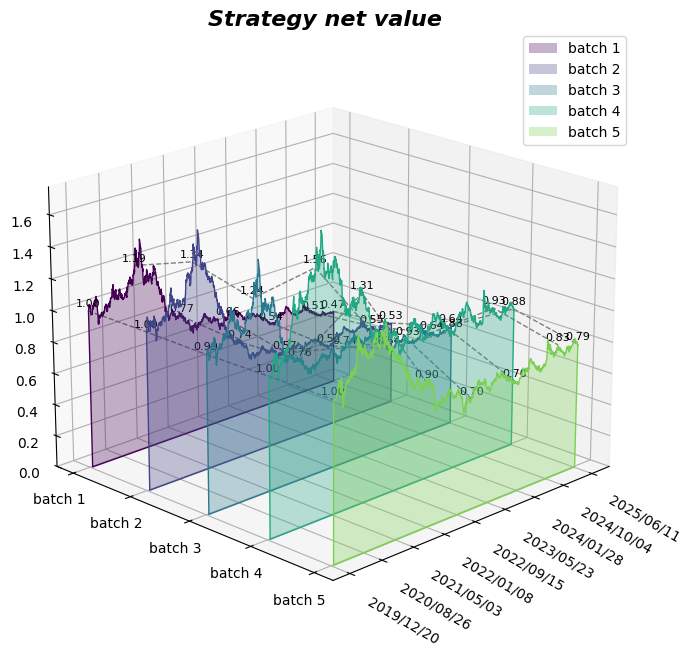

In [10]:
perf_plot.create_tuning_plot(daily_ret)

### Returns Distribution

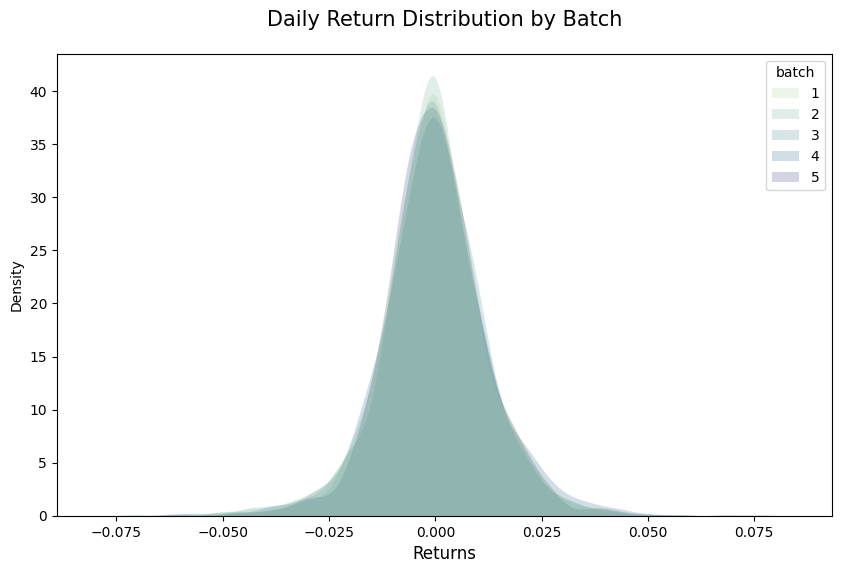

In [11]:
perf_plot.returns_dist_plot(daily_ret, type="overlap")

### Returns Distribution by Period

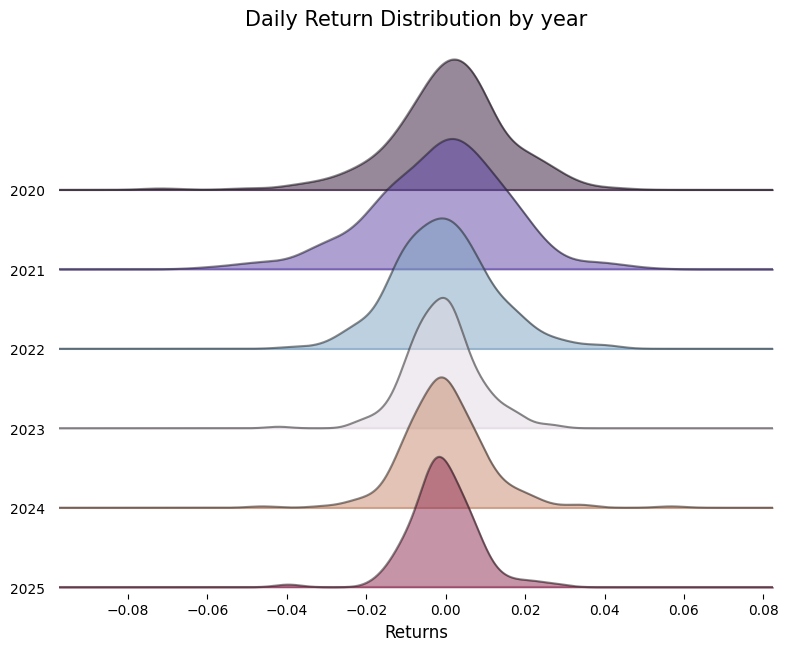

In [12]:
perf_plot.return_dist_by_period(port_ret_1, period="year")

### Returns Distribution with respect to Benchmark

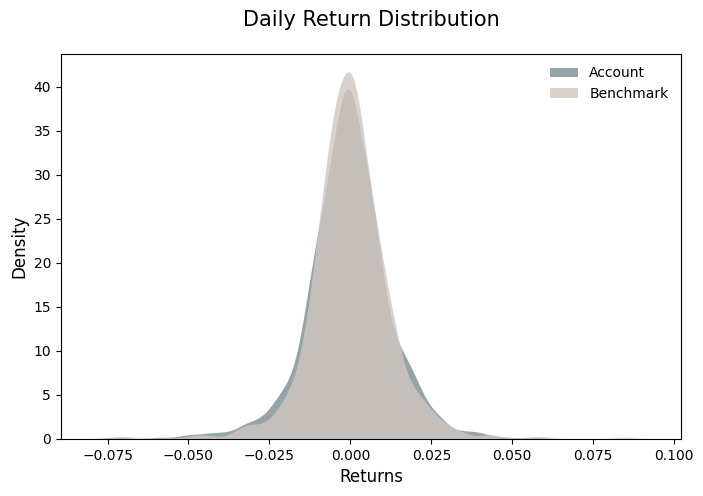

In [13]:
perf_plot.return_dist_with_benchmark(port_ret_1)

### Returns KDE Plot

<Figure size 640x480 with 0 Axes>

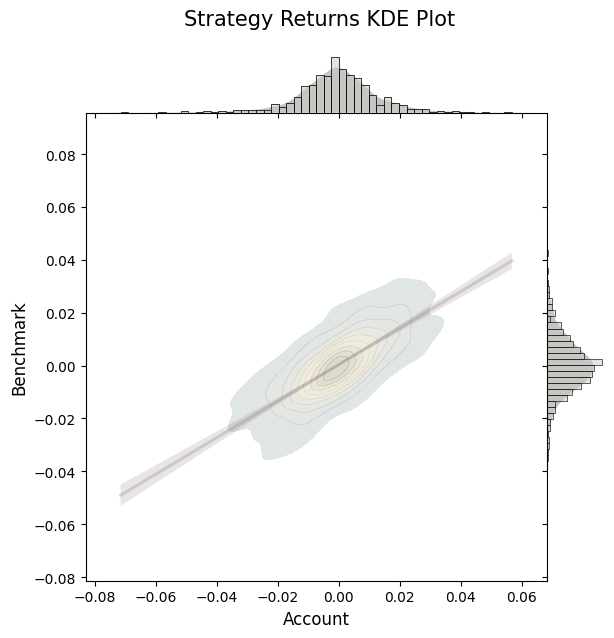

In [14]:
perf_plot.create_kde_plot(port_ret_1)

<Figure size 640x480 with 0 Axes>

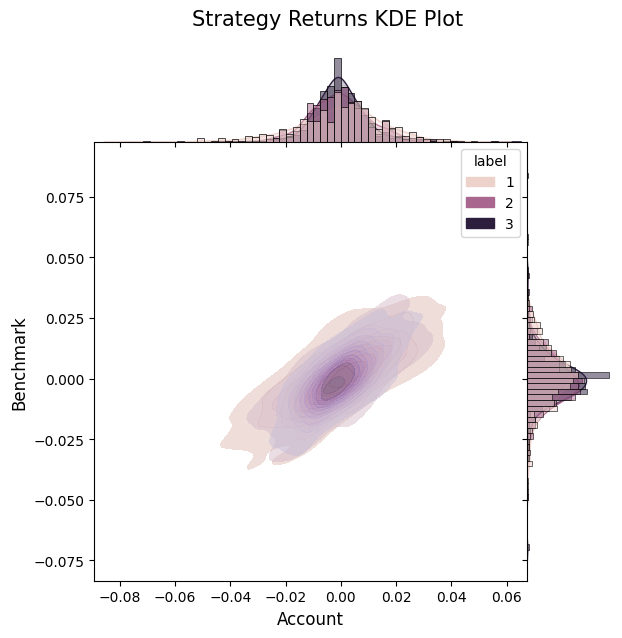

In [15]:
perf_plot.create_kde_plot(port_ret_1, section=3)

### Returns Calendar Heatmap

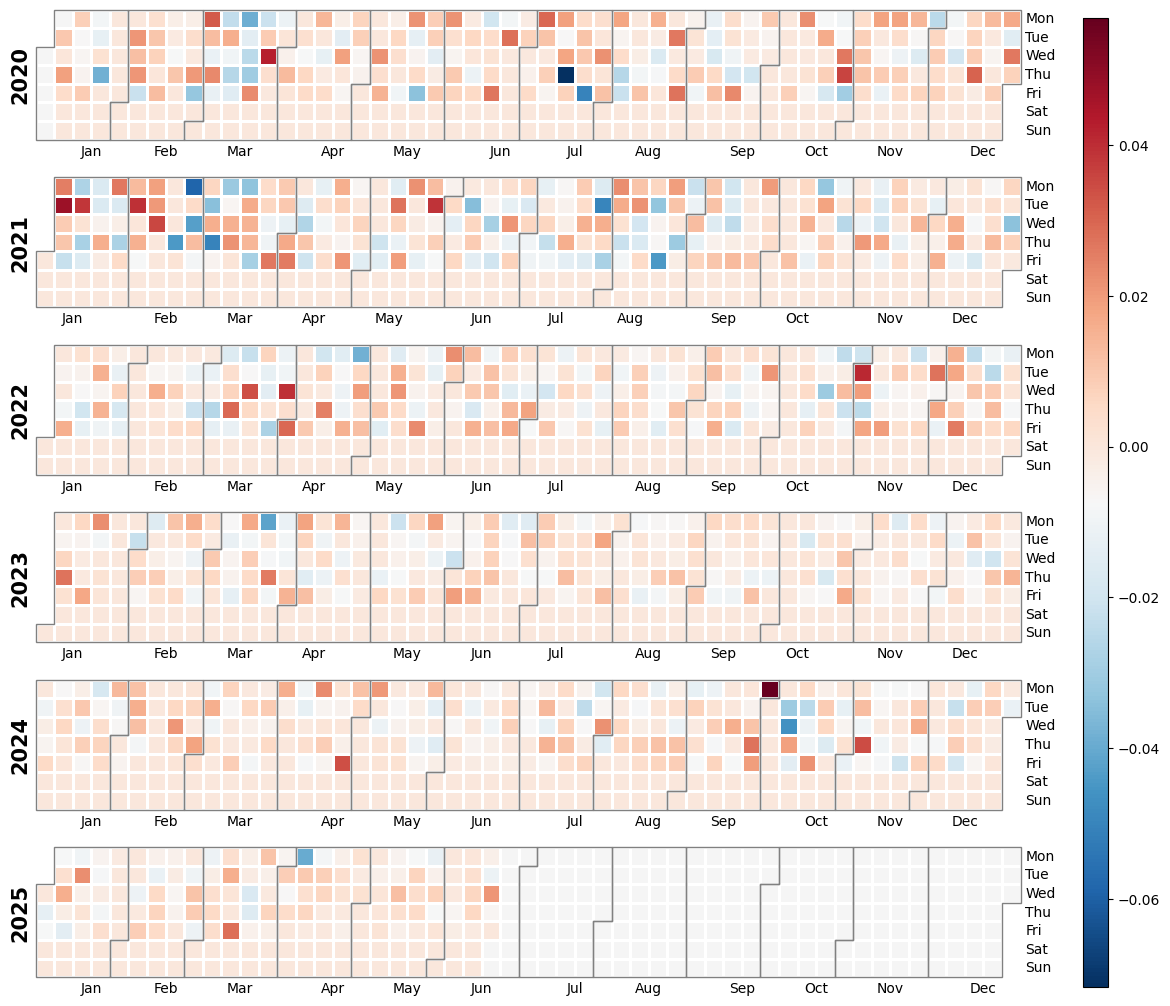

In [16]:
perf_plot.returns_heatmap(port_ret_1)

### Multiple Returns KDE Plot

In [17]:
from demo.strategy.single_factor_demo.single_factor_demo import FactorFactory

In [18]:
strategy2 = FactorFactory()

Calculating factor:
rank(Ts_ArgMax(SignedPower(where((returns < 0) ? Std(returns, 5) : close), 2.0), 5))
🧊 Initializing FROZEN Backtest Framework...
✅ Successfully connected to database    🔗 Done!                                


Performing Backtest: 100%|██████████| 235/235 [00:10<00:00, 21.99it/s]


🔔 Warnings: Not consistent with date_rule for the last holding period.
+-----------+-------------+---------------+--------+---------+----------+-----------+--------+------------+----------------+
|   Account |   Benchmark |   Annual Rate |   Beta |   Alpha |   Sharpe |   Sortino |     IR |   Win Rate |   Max Drawdown |
+===========+=============+===============+========+=========+==========+===========+========+============+================+
|    1.0891 |      0.8625 |        0.0201 | 0.5854 |  0.0399 |   0.1993 |    0.2949 | 0.0197 |     0.3825 |         0.4079 |
+-----------+-------------+---------------+--------+---------+----------+-----------+--------+------------+----------------+


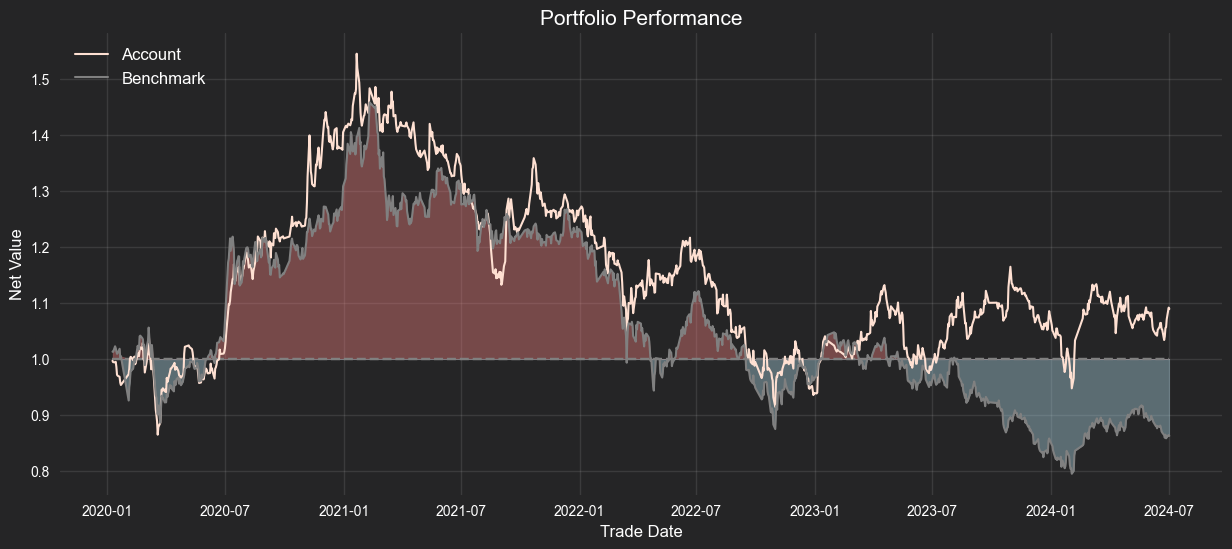

🎉 Execution complete!


In [19]:
port_ret_2 = strategy2.run_backtest()

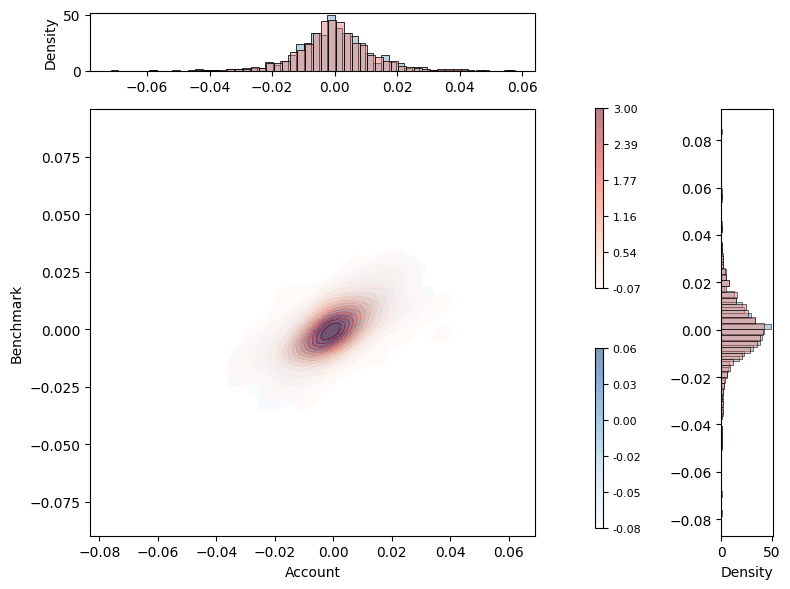

In [20]:
perf_plot.kde_2D(port_ret_1, port_ret_2)